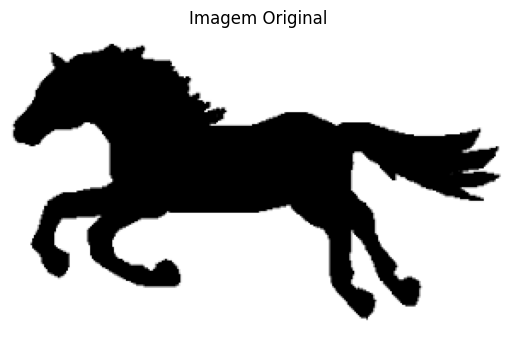

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('horse.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title("Imagem Original")
plt.axis('off')
plt.show()

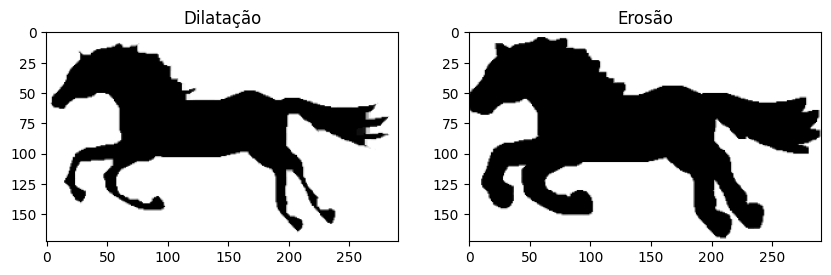

In [5]:
#4.1 dilatação/erosão.

def grayscale_dilate(img, kernel=None):
    if kernel is None:
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    return cv2.dilate(img, kernel)

def grayscale_erode(img, kernel=None):
    if kernel is None:
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    return cv2.erode(img, kernel)

dilated = grayscale_dilate(img)
eroded = grayscale_erode(img)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(dilated, cmap='gray'); plt.title("Dilatação")
plt.subplot(1,2,2); plt.imshow(eroded, cmap='gray'); plt.title("Erosão")
plt.show()

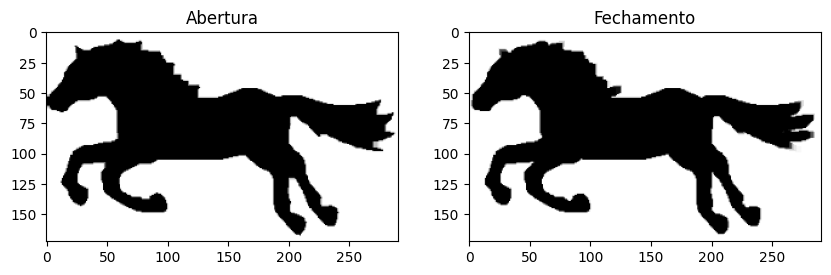

In [6]:
#4.2 abertura/fechamento

def grayscale_open(img, kernel=None):
    if kernel is None:
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

def grayscale_close(img, kernel=None):
    if kernel is None:
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

opened = grayscale_open(img)
closed = grayscale_close(img)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(opened, cmap='gray'); plt.title("Abertura")
plt.subplot(1,2,2); plt.imshow(closed, cmap='gray'); plt.title("Fechamento")
plt.show()

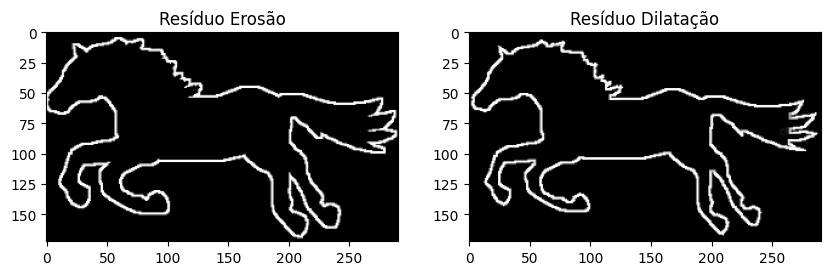

In [7]:
#4.3 atualização

residuo_erosao = cv2.subtract(img, eroded)
residuo_dilatacao = cv2.subtract(dilated, img)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(residuo_erosao, cmap='gray'); plt.title("Resíduo Erosão")
plt.subplot(1,2,2); plt.imshow(residuo_dilatacao, cmap='gray'); plt.title("Resíduo Dilatação")
plt.show()

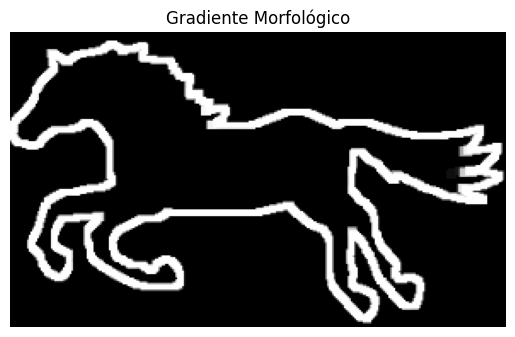

In [8]:
#4.4 gradiente morfológico

gradiente = cv2.subtract(dilated, eroded)
plt.imshow(gradiente, cmap='gray'); plt.title("Gradiente Morfológico"); plt.axis('off'); plt.show()

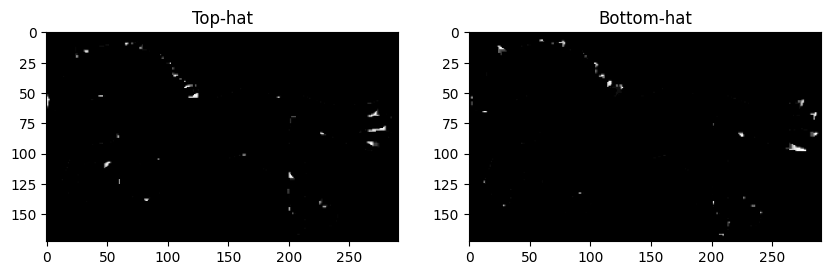

In [10]:
#4.5 top-hat/bottom-hat

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(tophat, cmap='gray'); plt.title("Top-hat")
plt.subplot(1,2,2); plt.imshow(blackhat, cmap='gray'); plt.title("Bottom-hat")
plt.show()

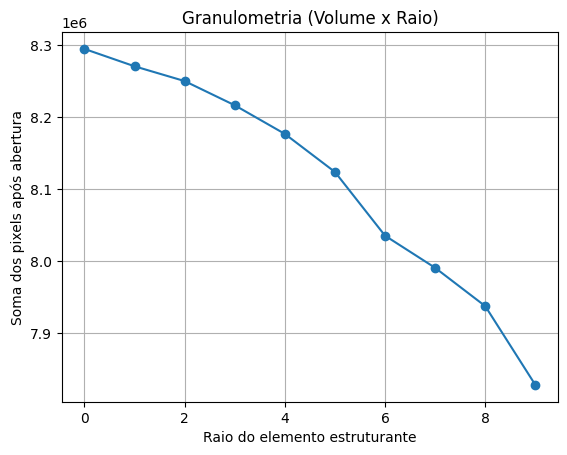

In [11]:
#4.6 granulometria

def granulometria(img, max_radius=10):
    volumes = []
    for r in range(1, max_radius + 1):
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*r+1, 2*r+1))
        opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
        volume = np.sum(opened)
        volumes.append(volume)
    return volumes

gran = granulometria(img, max_radius=10)

plt.plot(gran, marker='o')
plt.title("Granulometria (Volume x Raio)")
plt.xlabel("Raio do elemento estruturante")
plt.ylabel("Soma dos pixels após abertura")
plt.grid(True)
plt.show()

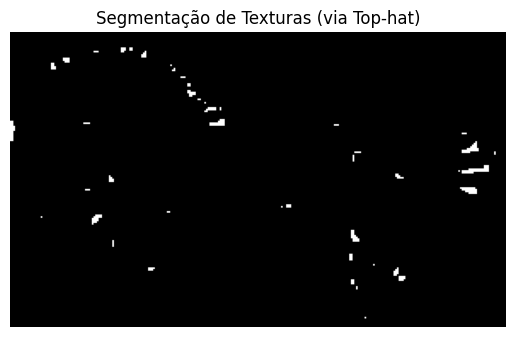

In [12]:
#4.7 segmentação de texturas

_, textura = cv2.threshold(tophat, 15, 255, cv2.THRESH_BINARY)

plt.imshow(textura, cmap='gray')
plt.title("Segmentação de Texturas (via Top-hat)")
plt.axis('off')
plt.show()